In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np


Using TensorFlow backend.


In [2]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

K.set_image_dim_ordering("th")
#(depth, input_depth, rows, cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 
X_test /= 255  

In [4]:
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [5]:
print(X_train.shape)

(60000, 1, 28, 28)


In [6]:
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)


In [7]:
model = Sequential()
# CONV => RELU => POOL
model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=INPUT_SHAPE))

model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [8]:
model.add(Conv2D(50, kernel_size=5, padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


In [9]:
model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

In [10]:
model.add(Dense(NB_CLASSES))
model.add(Activation("softmax"))


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 28, 28)        520       
_________________________________________________________________
activation_1 (Activation)    (None, 20, 28, 28)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 14, 14)        25050     
_________________________________________________________________
activation_2 (Activation)    (None, 50, 14, 14)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 7, 7)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

In [18]:
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 292s 6ms/step - loss: 0.1850 - acc: 0.9432 - val_loss: 0.0645 - val_acc: 0.9800
Epoch 2/20
48000/48000 [==============================] - 289s 6ms/step - loss: 0.0465 - acc: 0.9858 - val_loss: 0.0458 - val_acc: 0.9853
Epoch 3/20
48000/48000 [==============================] - 300s 6ms/step - loss: 0.0312 - acc: 0.9906 - val_loss: 0.0390 - val_acc: 0.9883
Epoch 4/20
48000/48000 [==============================] - 310s 6ms/step - loss: 0.0232 - acc: 0.9924 - val_loss: 0.0340 - val_acc: 0.9887
Epoch 5/20
48000/48000 [==============================] - 308s 6ms/step - loss: 0.0166 - acc: 0.9946 - val_loss: 0.0490 - val_acc: 0.9865
Epoch 6/20
48000/48000 [==============================] - 305s 6ms/step - loss: 0.0136 - acc: 0.9954 - val_loss: 0.0334 - val_acc: 0.9908
Epoch 7/20
48000/48000 [==============================] - 279s 6ms/step - loss: 0.0103 - acc: 0.9967 - val_loss: 0.0334 - 

In [20]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[1])

10000/10000 [==============================] - 26s 3ms/step

Test score: 0.9926


In [21]:
import matplotlib.pyplot as plt

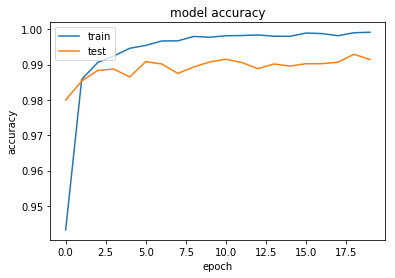

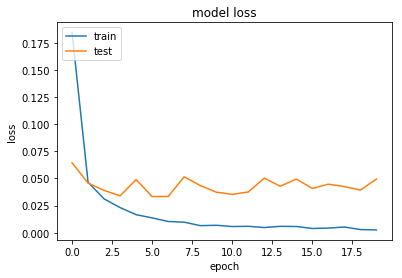

In [22]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()